In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('energySoftware.csv', sep=',')
data.head()

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671


## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

The hand-in exercise for this topic is Exercise 3 from the notebook “Exercises in
statistics.ipynb”.

In [3]:
data['test'].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

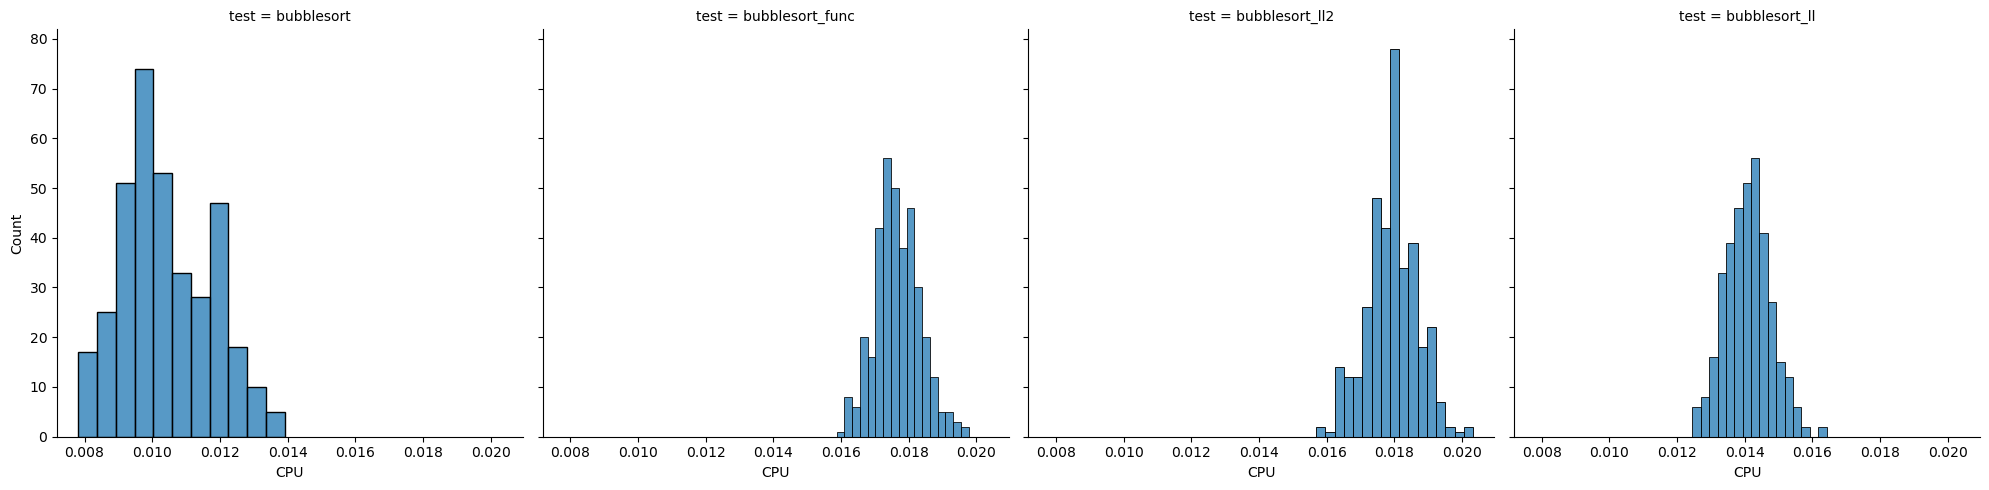

In [4]:
ax = sns.FacetGrid(data, col='test', height=5)
ax.map(sns.histplot, 'CPU')

2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 

**Test choice**
- The variable type is **numeric**
- Variables are **normaly distribuded**
- Size of the sample is **large**
- Data is **non-paired**
- The groups dont have **similar shape of distribution**
- **Student t test**

**Null hypothesis**
- There is no difference in the CPU between bubblesort and bubblesort_ll
(the medians are equal)

**Alternative hypothesis**
Alternative hypothesis
- There is a difference in the CPU between bubblesort and bubblesort_ll

**Significanse level**
Standard <0.05

In [5]:
stats.ttest_ind(data[data['test'] == 'bubblesort']['CPU'], data[data['test'] == 'bubblesort_ll']['CPU'])

TtestResult(statistic=np.float64(-47.4605163039462), pvalue=np.float64(9.831404686369687e-224), df=np.float64(719.0))

It seems like null hypothesis can be rejected and that there is difference in the cpu between bubblesort and bubblesort_ll.

3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?

**Test choice**
- The variable type is **numeric**
- Variables are **normaly distribuded**
- Size of the sample is **large**
- Data is **paired**
- The groups have **similar shape of distribution**
- **Student t test**

**Null hypothesis**
- There is no difference in the CPU between bubblesort_func and bubblesort_ll2
(the medians are equal)

**Alternative hypothesis**
Alternative hypothesis
- There is a difference in the CPU between bubblesort_func and bubblesort_ll2

**Significanse level**
Standard <0.05

In [6]:
stats.ttest_ind(data[data['test'] == 'bubblesort_func']['CPU'], data[data['test'] == 'bubblesort_ll2']['CPU'])

TtestResult(statistic=np.float64(-4.692273179928857), pvalue=np.float64(3.2355729348933066e-06), df=np.float64(718.0))

There is a difference and it is most probably big

(21078.5) suggests that the sum of the ranks of the differences is large

4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).


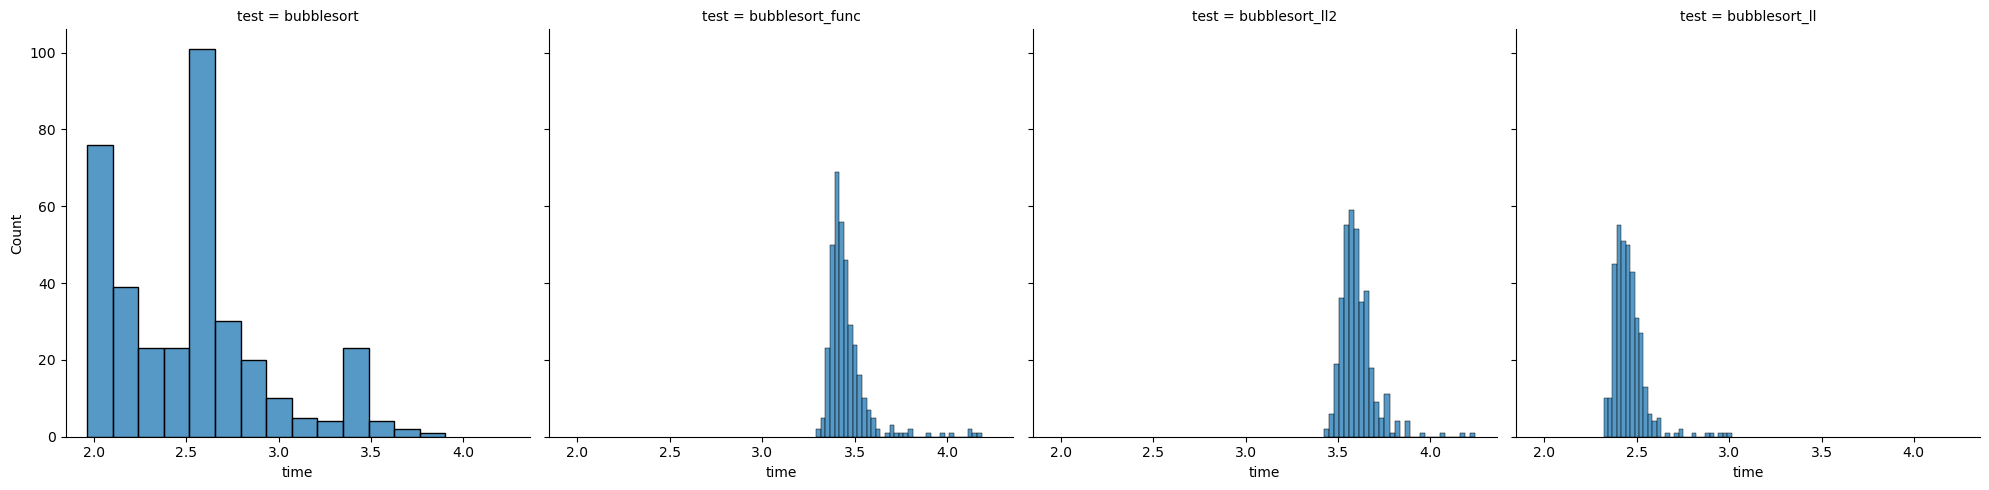

In [7]:
ax = sns.FacetGrid(data, col='test', height=5)
ax.map(sns.histplot, 'time')

**Test choice**
- The variable type is **numeric**
- Variables are ** not normaly distribuded**
- Size of the sample is **large**
- Data is **unpaired**
- The groups dont have **similar shape of distribution**
- **Maan-Whitney U test**

**Null hypothesis**
- There is no difference in time between bubblesort_func and bubblesort_ll2
(the medians are equal)

**Alternative hypothesis**
Alternative hypothesis
- There is a difference in time between bubblesort_func and bubblesort_ll2

**Significanse level**
Standard <0.05

In [8]:
stats.mannwhitneyu(data[data['test'] == 'bubblesort_func']['time'], data[data['test'] == 'bubblesort_ll2']['time'])

MannwhitneyuResult(statistic=np.float64(11015.5), pvalue=np.float64(8.834883020803326e-83))

we can reject the null hypothesis


5. Perform an ANOVA test to test if there is a difference in means across groups for CPU


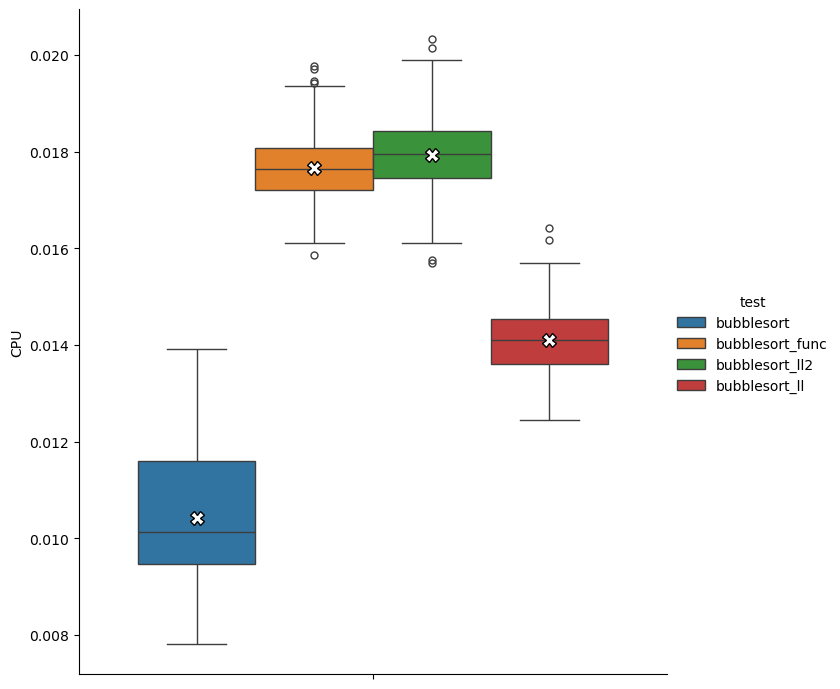

In [9]:
sns.catplot(y="CPU", hue = "test", data = data, kind="box", height = 7,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

In [10]:
stats.f_oneway(data[data["test"]=="bubblesort"]["CPU"],
               data[data["test"]=="bubblesort_func"]["CPU"],
               data[data["test"]=="bubblesort_ll2"]["CPU"],
               data[data["test"]=="bubblesort_ll"]["CPU"])

F_onewayResult(statistic=np.float64(5641.93769602928), pvalue=np.float64(0.0))

there is significant difference

6. Perform an ANOVA test to test if there is a difference in means across groups for time

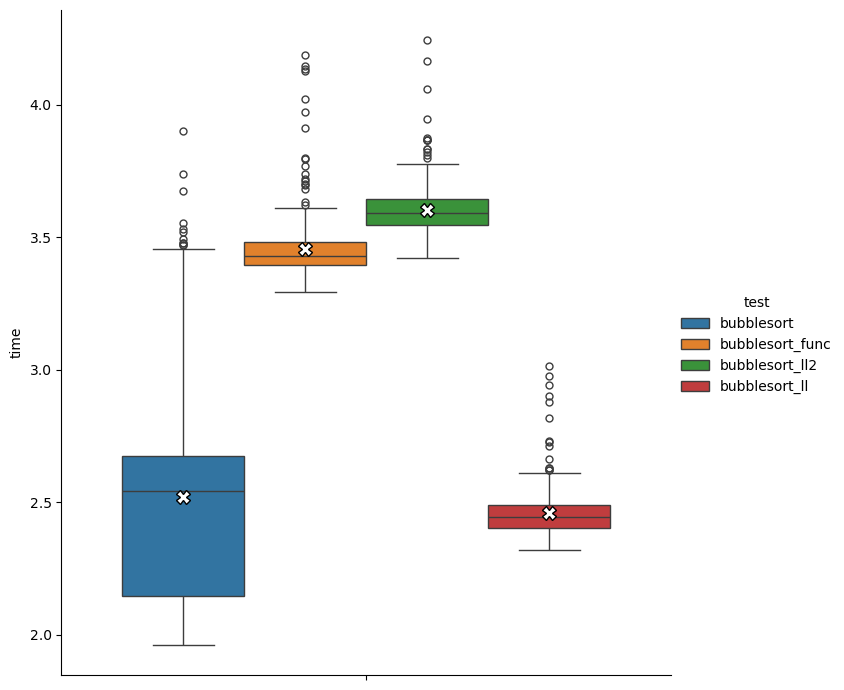

In [11]:
sns.catplot(y="time", hue = "test", data = data, kind="box", height = 7,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

In [12]:
stats.f_oneway(data[data["test"]=="bubblesort"]["time"],
               data[data["test"]=="bubblesort_func"]["time"],
               data[data["test"]=="bubblesort_ll2"]["time"],
               data[data["test"]=="bubblesort_ll"]["time"])

F_onewayResult(statistic=np.float64(2556.332935412784), pvalue=np.float64(0.0))

there is a big difference between means